In [9]:
#Transfer learning, Using Pre-trained models to train a tree classifier
import tensorflow as tf

data_dir = "dataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

#Pre-Processsing the images
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

#Loading pre-trained MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights="imagenet")
base_model.trainable = False # freeze weights

#Adding custom classifier
model = models.Sequential([
    base_model, layers.GlobalAveragePooling2D(), 
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid") #Binary classification
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

#Training the model
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5
                   )
#Evaluation of Model
loss, acc = model.evaluate(val_ds)
print("Validation accuracy:", acc)


Found 10400 files belonging to 2 classes.
Using 8320 files for training.
Found 10400 files belonging to 2 classes.
Using 2080 files for validation.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5


2025-09-25 16:28:21.899166: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 51380224 exceeds 10% of free system memory.
2025-09-25 16:28:22.104318: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 51380224 exceeds 10% of free system memory.
2025-09-25 16:28:22.212186: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 154140672 exceeds 10% of free system memory.
2025-09-25 16:28:22.361349: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 156905472 exceeds 10% of free system memory.
2025-09-25 16:28:22.520238: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 57802752 exceeds 10% of free system memory.


260/260 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.9517 - loss: 0.1254 - val_accuracy: 0.9760 - val_loss: 0.0666
Epoch 2/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.9752 - loss: 0.0695 - val_accuracy: 0.9760 - val_loss: 0.0665
Epoch 3/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.9812 - loss: 0.0524 - val_accuracy: 0.9846 - val_loss: 0.0451
Epoch 4/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.9814 - loss: 0.0471 - val_accuracy: 0.9784 - val_loss: 0.0554
Epoch 5/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.9858 - loss: 0.0394 - val_accuracy: 0.9865 - val_loss: 0.0428
65/65 ━━━━━━━━━━━━━━━━━━━━ 65s 997ms/step - accuracy: 0.9865 - loss: 0.0428 
Validation accuracy: 0.9865384697914124


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━

2025-09-25 17:32:23.092270: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


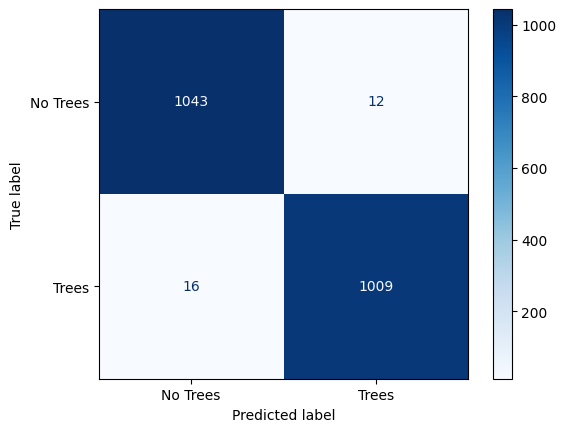

In [10]:
#Evaluation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#True labels and predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype("int32")
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

# The confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Trees", "Trees"])
disp.plot(cmap=plt.cm.Blues)
plt.show()